<a href="https://colab.research.google.com/github/vsbc-rae/Reconocimiento_de_placas/blob/main/Reconocimiento_placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KERAS_OCR

### Librerías y keras-ocr

In [ ]:
!pip install keras-ocr

import keras_ocr
import cv2
from collections import OrderedDict
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from copy import copy 

     |████████████████████████████████| 57 kB 2.2 MB/s 
     |████████████████████████████████| 9.5 MB 9.0 MB/s 
     |████████████████████████████████| 868 kB 41.8 MB/s 
     |████████████████████████████████| 123 kB 37.0 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.7-py3-none-any.whl size=43749 sha256=cde0b6e0b8d0b2e80627b97378804dbbafef3e0508cd11117e4599d898dd4e22
  Stored in directory: /root/.cache/pip/wheels/e4/e4/f3/05528293e01d7fa089343d5a5fd63dd07d79f57103fe9fc159
Successfully built keras-ocr


### Pesos preentrenados

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Looking for /root/.keras-ocr/crnn_kurapan.h5


### Funciones a utilizar

In [ ]:
# Esta función permite filtrar las imágenes que se van a procesar. Si la altura de la imagen es menor a 28 PPI, la imagen se descarta.
# La función retorna una lista con las imágenes a procesar (matriz); y otra (descarte), donde se indica que la imagen ha sido descartada,
# muestra el orden de esa imagen, además de su altura.

def imgFilter(matriz_o):
  hc = 28 #altura crítica
  matriz = []
  descarte = []
  i=0
  pos_dct = []
  for img in matriz_o:
    i=i+1
    height,_,_ = (img.shape)
    if height < hc:
      pos_dct.append(i-1)
      descarte.append("Placa #" + str(i) + " descartada por tener un tamaño muy pequeño (" + str(height) + ").")
    else:
      matriz.append(img)
  return (matriz, descarte)

In [ ]:
# Esta función corrige los caracteres erróneos, los reemplaza por los más cercanos posibles. Por ejemplo, si en el reconocimiento de la
# placa, un caracter que debería ser un número, se reconoce como letra; esta función la cambia a un número, teniendo en cuenta la forma
# de la letra. Es decir, si se reconoce como Z el 2, se hace el respectivo cambio.
# Lo mismo sucede en el caso contrario.

def cFilter(character):
  if character.isdigit() == True:
    if character == '0':
      character = 'd'
      return character
    elif character == '1':
      character = 'i'
      return character
    elif character == '2':
      character = 'z'
      return character
    elif character == '3':
      character = 'b'
      return character
    elif character == '4':
      character = 'a'
      return character
    elif character == '6':
      character = 'g'
      return character
    elif character == '7':
      character = 'v'
      return character
    elif character == '8':
      character = 'b'
      return character
    elif character == '9':
      character = 'j'
      return character
    else:
      character = '_'
      return character
  else:
    if character == 'a':
      character = '4'
      return character
    elif character == 'b':
      character = '8'
      return character
    elif character == 'c':
      character = '6'
      return character
    elif character == 'd':
      character = '0'
      return character
    elif character == 'e':
      character = '8'
      return character
    elif character == 'f':
      character = '5'
      return character
    elif character == 'g':
      character = '4'
      return character
    elif character == 'h':
      character = '4'
      return character
    elif character == 'i':
      character = '1'
      return character
    elif character == 'j':
      character = '5'
      return character
    elif character == 'k':
      character = '8'
      return character
    elif character == 'l':
      character = '1'
      return character
    elif character == 'm':
      character = '8'
      return character
    elif character == 'n':
      character = '4'
      return character
    elif character == 'o':
      character = '0'
      return character
    elif character == 'p':
      character = '9'
      return character
    elif character == 'q':
      character = '0'
      return character
    elif character == 'r':
      character = '8'
      return character
    elif character == 's':
      character = '8'
      return character
    elif character == 't':
      character = '1'
      return character
    elif character == 'u':
      character = 'u'
      return character
    elif character == 'v':
      character = 'v'
      return character
    elif character == 'w':
      character = 'w'
      return character
    elif character == 'x':
      character = 'x'
      return character
    elif character == 'y':
      character = '7'
      return character
    elif character == 'z':
      character ='2'
      return character
    else:
      character = '*'
      return character

In [ ]:
# Esta función evalúa el primer caracter del código de la placa, el cual va a determinar la Zona Registral de inmatriculación.

def zona_Registral(placa):  
  if placa[0] == 'P':
    return('Zona Registral Nº I - Sede Piura')
  elif placa[0] == 'K':
    return('Zona Registral Nº II - Sede Chiclayo')
  elif placa[0] == 'S':
    return('Zona Registral Nº III - Sede Moyobamba')
  elif placa[0] == 'L':
    return('Zona Registral Nº IV - Sede Iquitos')
  elif placa[0] == 'T':
    return('Zona Registral Nº V - Sede Trujillo')
  elif placa[0] == 'U':
    return('Zona Registral Nº VI - Sede Pucallpa')
  elif placa[0] == 'H':
    return('Zona Registral Nº VII - Sede Huaraz')
  elif placa[0] == 'W':
    return('Zona Registral Nº VIII - Sede Huancayo')
  elif placa[0] == 'A' or placa[0] == 'B' or placa[0] == 'C' or placa[0] == 'D' or placa[0] == 'F':
    return('Zona Registral Nº IX - Sede Lima')
  elif placa[0] == 'X':
    return('Zona Registral Nº X - Sede Cusco')
  elif placa[0] == 'Y':
    return('Zona Registral Nº XI - Sede Ica')
  elif placa[0] == 'V':
    return('Zona Registral Nº XII - Sede Arequipa')
  elif placa[0] == 'Z':
    return('Zona Registral Nº XIII - Sede Tacna')
  elif placa[0] == 'I':
    return('Zona Registral Nº XIV - Sede Ayacucho')
  elif placa[0] == '_':
    return('Zona no identificada')
  else:
    return("Caracteres de Reserva")

In [ ]:
# Esta función determina si un array posee un número.

def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

In [ ]:
# Esta función pretende ordenar de manera correcta a parte alfanumérica, siendo el formato idea LNL.

## Types_let
# 1 = LNL (ideal_let)
# 2 = LNN
# 3 = LLL
# 4 = LLN
# 5 = NNL
# 6 = NNN
# 7 = NLL
# 8 = NLN

def plateType_let(l):
  list_ = copy(l)
  for i in range(len(list_)):
    if list_[i][0].isdigit() == False:
      if list_[i][1].isdigit() == True:
        if list_[i][2].isdigit() == False:
          list_[i] = list_[i].upper()
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
          list_[i] = list_[i].upper()
      else:
        list_[i] = list_[i][0] + cFilter(list_[i][1]) + list_[i][2]
        if list_[i][2].isdigit() == False:
          list_[i] = list_[i].upper()
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
          list_[i] = list_[i].upper()
    else:
      list_[i] = cFilter(list_[i][0]) + list_[i][1:3]
      if list_[i][1].isdigit() == True:
        if list_[i][2].isdigit() == False:
          list_[i] = list_[i].upper()
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
          list_[i] = list_[i].upper()
      else:
        list_[i] = list_[i][0] + cFilter(list_[i][1]) + list_[i][2]
        if list_[i][2].isdigit() == False:
          list_[i] = list_[i].upper()
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
          list_[i] = list_[i].upper()
  return(list_)

In [ ]:
# Esta función pretende ordenar de manera correcta a parte numérica, siendo el formato idea NNN.

## Types_num
# 1 = NNN (ideal_num)
# 2 = NNL
# 3 = NLN
# 4 = NLL
# 5 = LNN
# 6 = LNL
# 7 = LLN
# 8 = LLL

def plateType_num(l):
  list_ = copy(l)
  for i in range(len(list_)):
    if list_[i][0].isdigit() == True:
      if list_[i][1].isdigit() == True:
        if list_[i][2].isdigit() == True:
          continue
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
      else:
        list_[i] = list_[i][0] + cFilter(list_[i][1]) + list_[i][2]
        if list_[i][2].isdigit() == True:
          continue
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
    else:
      list_[i] = cFilter(list_[i][0]) + list_[i][1:3]
      if list_[i][1].isdigit() == True:
        if list_[i][2].isdigit() == True:
          continue
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
      else:
        list_[i] = list_[i][0] + cFilter(list_[i][1]) + list_[i][2]
        if list_[i][2].isdigit() == True:
          continue
        else:
          list_[i] = list_[i][0:2] + cFilter(list_[i][2])
  return(list_)

In [ ]:
# Esta función une las dos listas que conforman el código de la placa, la primera es la parte alfanumérica y la segunda es la numérica. La
# unión se hace de tal manera que entre ambas se le agrega un guión ('-').

def union(vrf_cod_num, vrf_cod_let):
  plate_vrf = []
  for i in range(len(vrf_cod_num)):
    c = vrf_cod_let[i] + '-' + vrf_cod_num[i]
    plate_vrf.append(c)
  return plate_vrf

### Importación de imágenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

imagesk = []

# Se copia la ruta de las imágenes de placas que uno posee
images_k_o =[keras_ocr.tools.read(img) for img in['/content/drive/MyDrive/Colab Notebooks/data/P1.jpg',
                                                  '/content/drive/MyDrive/Colab Notebooks/data/P2.jpg',
                                                  '/content/drive/MyDrive/Colab Notebooks/data/P3.jpg',
                                                  '/content/drive/MyDrive/Colab Notebooks/data/P4.jpg',
                                                  '/content/drive/MyDrive/Colab Notebooks/data/P5.jpg',
                                                  '/content/drive/MyDrive/Colab Notebooks/data/P6.jpg'                                  
]]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Procesamiento de imágenes

In [ ]:
hmin = 140 #altura minima requerida
hmax = 600 #altura máxima requerida

images_k, descarte = imgFilter(images_k_o)

for img in images_k:
  height,_,_ = (img.shape)
  print(height)
  if height < hmin: #Si la imagen es pequeña
    k = hmin/height #constante de aumento de la imagen
    cv2.resize(img, (0,0), fx=k, fy=k) #Aumento del tamaño
    blur = cv2.blur(img,(1,1)) #'elimina el ruido' de la imagen
    image = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
  else:
    if height < hmax:
      blur = cv2.blur(img,(8,8)) #'elimina el ruido' de la imagen
      image = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
    else:
      k = hmax/height #constante de reducción de la imagen
      cv2.resize(img, (0,0), fx=k, fy=k) #Reducción del tamaño
      blur = cv2.blur(img,(15,15)) #'elimina el ruido' de la imagen
      image = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
  imagesk.append(image)

for dct in descarte:
  print(dct)

169
233
390
246
149
377


### Reconocimiento

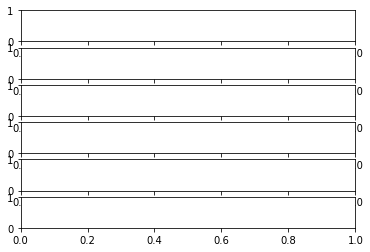

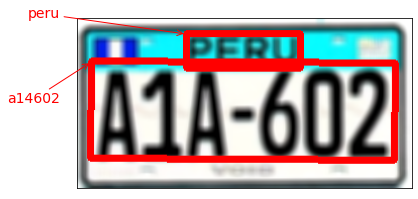

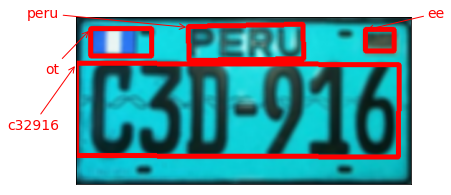

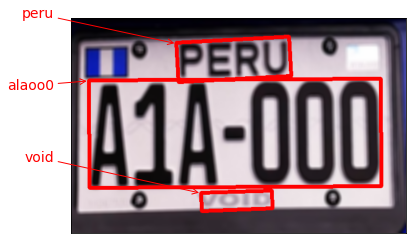

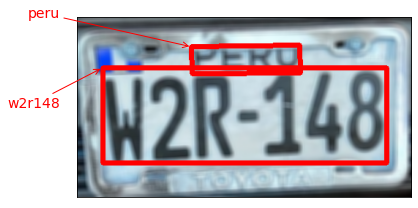

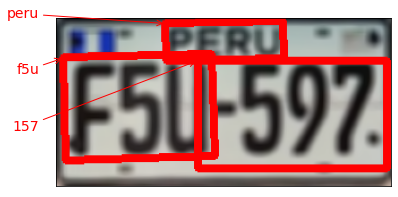

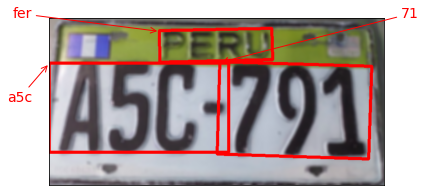

In [ ]:
# Se realiza la predicción.
prediction_groups = pipeline.recognize(imagesk)
fig = plt.subplots(nrows = len(imagesk))

# Se muestran los resultados.
for image, predictions in zip(imagesk, prediction_groups):
  keras_ocr.tools.drawAnnotations(image = image, predictions = predictions)

### Tratamiento de los códigos de las placas y extracción de posiciones


In [ ]:
# Se leen los resultados de cada imagen i se guardan el la matriz 'plate'.
plate = []
for i in range(len(prediction_groups)):
  plate_ = []
  for j in range(len(prediction_groups[i])):
    plate_.append(prediction_groups[i][j][0])
  plate.append(plate_)
print(plate)

[['peru', 'a14602'], ['peru', 'ot', 'ee', 'c32916'], ['peru', 'alaoo0', 'void'], ['peru', 'w2r148'], ['peru', 'f5u', '157'], ['fer', 'a5c', '71']]


In [ ]:
# Se separan en dos opciones. Una si el texto reconocido tiene un tamaño menor a 7, y otra en donde la placa reconocida se divide en
# en dos bloques de 3 cada uno.

cod1 = []
pos_cod1 = []
cod2 = []
pos_cod2 = []
for i in range(len(plate)):
  cod1_ = []
  cod2_ = []
  for j in range(len(plate[i])):
    if len(plate[i][j]) < 7:
      hn = hasNumbers(plate[i][j])
      if len(plate[i][j]) > 4:
        cod1_.append(plate[i][j])
        pos_cod1.append(i)
      else:
        if (len(plate[i][j]) < 5 and len(plate[i][j]) > 1 and plate[i][j] not in 'peru' and plate[i][j] not in 'void'):
          cod2_.append(plate[i][j])
          pos_cod2.append(i)
    else:
      continue
  cod1.append(cod1_)
  cod2.append(cod2_)
pos_cod2 = list(set(pos_cod2))

print(cod1)
print(pos_cod1)
print(cod2)
print(pos_cod2)

[['a14602'], ['c32916'], ['alaoo0'], ['w2r148'], [], []]
[0, 1, 2, 3]
[[], ['ot', 'ee'], [], [], ['f5u', '157'], ['fer', 'a5c', '71']]
[1, 4, 5]


In [ ]:
cod_let1 = []
cod_num1 = []

for i in range(len(cod1)):
  for j in range(len(cod1[i])):
    if len(cod1[i][j]) == 6:
      cod_num1.append(cod1[i][j][3:6])
      cod_let1.append(cod1[i][j][0:3])
    elif len(cod1[i][j]) == 5:
      if cod1[i][j][2].isdigit() == True and cod1[i][j][3].isdigit() == True and cod1[i][j][4].isdigit() == True:
        if cod1[i][j][0].isdigit() == True and cod1[i][j][1].isdigit() == False:
          c = '_' + cod1[i][j]
          cod_let1.append(c[0:3])
          cod_num1.append(c[3:6])
        elif cod1[i][j][0].isdigit() == False and cod1[i][j][1].isdigit() == True:
          c = cod1[i][j][0:2] + '_' + cod1[i][j][2:5]
          cod_let1.append(c[0:3])
          cod_num1.append(c[3:6])
        else:
          c = cod1[i][j][0] + '_' + cod1[i][j][1:5]
          cod_let1.append(c[0:3])
          cod_num1.append(c[3:6])
      elif cod1[i][j][2].isdigit() == False and cod1[i][j][3].isdigit() == True and cod1[i][j][4].isdigit() == True:
        if cod1[i][j][1].isdigit() == True:
          c = cod1[i][j] + '*'
          cod_let1.append(c[0:3])
          cod_num1.append(c[3:6])
        else:
          if cod[i][j][0].isdigit() == True:
            c = '_' + cod1[i][j]
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
          else:
            c = cod1[i][j] + '*'
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
      elif cod1[i][j][2].isdigit() == False and cod1[i][j][3].isdigit() == False and cod1[i][j][4].isdigit() == True:
        if cod1[i][j][1].isdigit() == True:
          if cod1[i][j][0].isdigit() == True:
            c = '_' + cod1[i][j]
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
          else:
            c = cod1[i][j] + '*'
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
        else:
          if cod1[i][j][0].isdigit() == True:
            c = '_' + cod1[i][j]
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
          else:
            c = cod1[i][j] + '*'
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
      else:
        if cod1[i][j][1].isdigit() == True:
          c = cod1[i][j] + '*'
          cod_let1.append(c[0:3])
          cod_num1.append(c[3:6])
        else:
          if cod1[i][j][0].isdigit() == True:
            c = '_' + cod1[i][j]
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
          else:
            c = cod1[i][j][0] + '_' + cod1[i][j][1:5]
            cod_let1.append(c[0:3])
            cod_num1.append(c[3:6])
    else:
      c = '_*' + cod1[i][j]
      cod_let1.append(c[0:3])
      cod_num1.append(c[3:6])

print(cod_let1)
print(cod_num1)

['a14', 'c32', 'ala', 'w2r']
['602', '916', 'oo0', '148']


In [ ]:
cod_num2 = []
cod_let2 = []

for i in range(len(cod2)):
  for j in range(len(cod2[i])):
    if len(cod2[i]) > 1 and len(cod2[i][j]) > 1:
      if len(cod2[i][j]) == 3 and cod2[i][j].isdigit() == True:
        cod_num2.append(cod2[i][j][0:3])
      elif len(cod2[i][j]) == 2 and cod2[i][j].isdigit() == True:
        c = cod2[i][j][0] + '*' + cod2[i][j][1]
        cod_num2.append(c)
      else:
        if cod2[i][j] not in 'erp-ee-fer' and cod2[i][j] not in 'ot':
          cod_let2.append(cod2[i][j][0:3])

print(cod_let2)
print(cod_num2)

['f5u', 'a5c']
['157', '7*1']


### Correción de las placas

In [ ]:
vrf_cod_let1 = plateType_let(cod_let1)
vrf_cod_num1 = plateType_num(cod_num1)

vrf_cod_let2 = plateType_let(cod_let2)
vrf_cod_num2 = plateType_num(cod_num2)

### Unión de las 2 partes de cada placa

In [ ]:
pos_cod = pos_cod1 + pos_cod2
pos_cod_vrf_ = list(OrderedDict.fromkeys(pos_cod))
print(pos_cod_vrf_)

[0, 1, 2, 3, 4, 5]


In [ ]:
plate_vrf1 = union(vrf_cod_num1, vrf_cod_let1)
plate_vrf2 = union(vrf_cod_num2, vrf_cod_let2)

plate_vrf_ = plate_vrf1 + plate_vrf2

In [ ]:
plate_vrf = [''] * len(images_k)

j = 0
for i in pos_cod_vrf_:
  plate = plate_vrf_[j]
  plate_vrf[i] = plate
  j = j + 1

### Placas verificadas

In [ ]:
for i in range(len(plate_vrf)-1):
  if plate_vrf[i] == '':
    plate_vrf.remove(plate_vrf[i])

print(plate_vrf)

['A1A-602', 'C3Z-916', 'A1A-000', 'W2R-148', 'F5U-157', 'A5C-7*1']


### Zona Registral

In [ ]:
for i in range(len(plate_vrf)):
  zona = zona_Registral(plate_vrf[i])
  plate = plate_vrf[i]
  print(plate)
  print(zona)
  print()

A1A-602
Zona Registral Nº IX - Sede Lima

C3Z-916
Zona Registral Nº IX - Sede Lima

A1A-000
Zona Registral Nº IX - Sede Lima

W2R-148
Zona Registral Nº VIII - Sede Huancayo

F5U-157
Zona Registral Nº IX - Sede Lima

A5C-7*1
Zona Registral Nº IX - Sede Lima



# Easy-OCR

### Instalación de dependencias

In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 8.2 kB/s 


In [ ]:
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

### Enlace a carpeta de drive, donde se encuentran las imágenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Asignación de nombre de las imágenes en el código

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/data/P1.jpg" placa_1.jpg #PLACA 1
!cp "/content/drive/MyDrive/Colab Notebooks/data/P2.jpg" placa_2.jpg #PLACA 2
!cp "/content/drive/MyDrive/Colab Notebooks/data/P3.jpg" placa_3.jpg #PLACA 3
!cp "/content/drive/MyDrive/Colab Notebooks/data/P4.jpg" placa_4.jpg #PLACA 4
!cp "/content/drive/MyDrive/Colab Notebooks/data/P5.jpg" placa_5.jpg #PLACA 5
!cp "/content/drive/MyDrive/Colab Notebooks/data/P6.jpg" placa_6.jpg #PLACA 6

In [ ]:
cropped_image1 = cv2.imread('placa_1.jpg')
cropped_image2 = cv2.imread('placa_2.jpg')
cropped_image3 = cv2.imread('placa_3.jpg')
cropped_image4 = cv2.imread('placa_4.jpg')
cropped_image5 = cv2.imread('placa_5.jpg')
cropped_image6 = cv2.imread('placa_6.jpg')

### A continuación se muestran los filtrados para cada placa

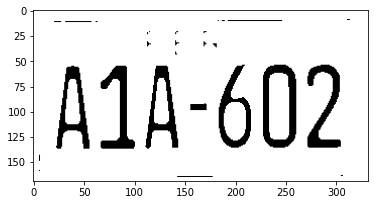

In [ ]:
gray1 = cv2.cvtColor(cropped_image1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.blur(gray1,(3,3))
gray1 = cv2.dilate(gray1, None, iterations=1)
gray1 = cv2.convertScaleAbs(gray1, alpha=3, beta=30)
(thresh, gray1) = cv2.threshold(gray1, 127, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(gray1, cv2.COLOR_BGR2RGB))

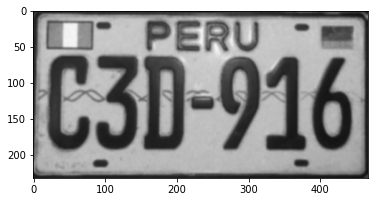

In [ ]:
gray2 = cv2.cvtColor(cropped_image2, cv2.COLOR_BGR2GRAY)
gray2 = cv2.blur(gray2,(3,3)) 

plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB))

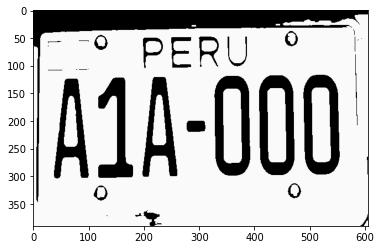

In [ ]:
gray3 = cv2.cvtColor(cropped_image3, cv2.COLOR_BGR2GRAY)
gray3 = cv2.blur(gray3,(3,2))
gray3 = cv2.dilate(gray3, None, iterations=1)
gray3 = cv2.convertScaleAbs(gray3, alpha=3, beta=2)
(thresh, gray3) = cv2.threshold(gray3, 127, 250, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(gray3, cv2.COLOR_BGR2RGB))

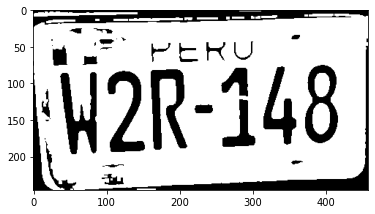

In [ ]:
gray4 = cv2.cvtColor(cropped_image4, cv2.COLOR_BGR2GRAY)
gray4 = cv2.blur(gray4,(3,3))
gray4 = cv2.dilate(gray4, None, iterations=1)
(thresh, gray4) = cv2.threshold(gray4, 127, 250, cv2.THRESH_BINARY)
gray4 = cv2.convertScaleAbs(gray4, alpha=3, beta=0)

plt.imshow(cv2.cvtColor(gray4, cv2.COLOR_BGR2RGB))

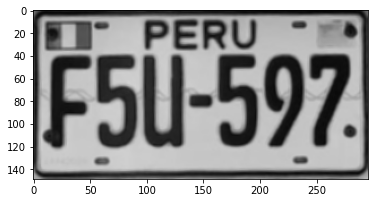

In [ ]:
gray5 = cv2.cvtColor(cropped_image5, cv2.COLOR_BGR2GRAY)
gray5 = cv2.blur(gray5,(3,3))

plt.imshow(cv2.cvtColor(gray5, cv2.COLOR_BGR2RGB))

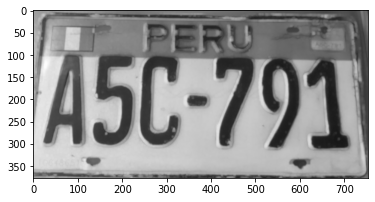

In [ ]:
gray6 = cv2.cvtColor(cropped_image6, cv2.COLOR_BGR2GRAY)
gray5 = cv2.blur(gray6,(3,3))
gray6 = cv2.dilate(gray6, None, iterations=1) 

plt.imshow(cv2.cvtColor(gray6, cv2.COLOR_BGR2RGB))

### Activación del lector OCR

In [ ]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


### Asignación de las tuplas a una variable correspondiente al número de imagen

In [ ]:
result1 = reader.readtext(gray1)
result2 = reader.readtext(gray2)
result3 = reader.readtext(gray3)
result4 = reader.readtext(gray4)
result5 = reader.readtext(gray5)
result6 = reader.readtext(gray6)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


### Asignación del número de placa con la posición del resultado en la tupla correspondiente

In [ ]:
text1 = result1[0][-2]
text1

'A1a-602'

In [ ]:
text2 = result2[1][-2]
text2

'CD-916'

In [ ]:
text3 = result3[0][-2]
text3

'PERU'

In [ ]:
text4 = result4[1][-2]
text4

'ii2R-148'

In [ ]:
text5 = result5[1][-2]
text5

'asC791'

In [ ]:
text6 = result6[1][-2]
text6

'Asc 791'

### Resultados

In [ ]:
print(text1)
print(text2)
print(text3)
print(text4)
print(text5)
print(text6)

A1a-602
CD-916
PERU
ii2R-148
asC791
Asc 791
